#### Table of Contents
- [1. Gold Analysis](#gold-analysis)
  - [i. Analysis and cleaning](#analysis-and-data-cleaning)
  - [ii. Uni-variated Decision Tree](#uni-variated-decision-tree-classification)

*Author: Mokshitt*

# Gold Analysis
Despite gold not being the top variables we have found through our EDA, we believe that it is still an important aspect of the game. So in this section we will look at the variable "Gold", do some EDA and try to fit a classification model to it.

In [1]:
import warnings
import matplotlib.pyplot as plt
warnings.simplefilter(action='ignore', category=(FutureWarning, UserWarning, DeprecationWarning))
import numpy as np
import pandas as pd
import seaborn as sns


from ast import literal_eval

### Analysis and data cleaning
Here we will do some basic EDA and data preparation

In [2]:
# Import Dataset
league_data = pd.read_csv("datasets/LeagueofLegends.csv")

# Shape of Dataset
print("Data dims: ", league_data.shape)

# Sneakpeak of Dataset
league_data.head()

Data dims:  (7620, 57)


,League,Year,Season,Type,blueTeamTag,bResult,rResult,redTeamTag,gamelength,golddiff,...,redMiddleChamp,goldredMiddle,redADC,redADCChamp,goldredADC,redSupport,redSupportChamp,goldredSupport,redBans,Address
0,NALCS,2015,Spring,Season,TSM,1,0,C9,40,"[0, 0, -14, -65, -268, -431, -488, -789, -494,...",...,Fizz,"[475, 475, 552, 842, 1178, 1378, 1635, 1949, 2...",Sneaky,Sivir,"[475, 475, 532, 762, 1097, 1469, 1726, 2112, 2...",LemonNation,Thresh,"[515, 515, 577, 722, 911, 1042, 1194, 1370, 14...","['Tristana', 'Leblanc', 'Nidalee']",http://matchhistory.na.leagueoflegends.com/en/...
1,NALCS,2015,Spring,Season,CST,0,1,DIG,38,"[0, 0, -26, -18, 147, 237, -152, 18, 88, -242,...",...,Azir,"[475, 475, 552, 786, 1097, 1389, 1660, 1955, 2...",CoreJJ,Corki,"[475, 475, 532, 868, 1220, 1445, 1732, 1979, 2...",KiWiKiD,Annie,"[515, 515, 583, 752, 900, 1066, 1236, 1417, 15...","['RekSai', 'Janna', 'Leblanc']",http://matchhistory.na.leagueoflegends.com/en/...
2,NALCS,2015,Spring,Season,WFX,1,0,GV,40,"[0, 0, 10, -60, 34, 37, 589, 1064, 1258, 913, ...",...,Azir,"[475, 475, 533, 801, 1006, 1233, 1385, 1720, 1...",Cop,Corki,"[475, 475, 533, 781, 1085, 1398, 1782, 1957, 2...",BunnyFuFuu,Janna,"[515, 515, 584, 721, 858, 1002, 1168, 1303, 14...","['Leblanc', 'Zed', 'RekSai']",http://matchhistory.na.leagueoflegends.com/en/...
3,NALCS,2015,Spring,Season,TIP,0,1,TL,41,"[0, 0, -15, 25, 228, -6, -243, 175, -346, 16, ...",...,Lulu,"[475, 475, 532, 771, 1046, 1288, 1534, 1776, 2...",KEITH,KogMaw,"[475, 475, 532, 766, 1161, 1438, 1776, 1936, 2...",Xpecial,Janna,"[515, 515, 583, 721, 870, 1059, 1205, 1342, 15...","['RekSai', 'Rumble', 'LeeSin']",http://matchhistory.na.leagueoflegends.com/en/...
4,NALCS,2015,Spring,Season,CLG,1,0,T8,35,"[40, 40, 44, -36, 113, 158, -121, -191, 23, 20...",...,Lulu,"[475, 475, 532, 807, 1042, 1338, 1646, 1951, 2...",Maplestreet8,Corki,"[475, 475, 532, 792, 1187, 1488, 1832, 2136, 2...",Dodo8,Annie,"[475, 475, 538, 671, 817, 948, 1104, 1240, 136...","['Rumble', 'Sivir', 'Rengar']",http://matchhistory.na.leagueoflegends.com/en/...


In [3]:
# extract golddiff column from df
gold = pd.DataFrame(league_data['golddiff'])
print("Data type : ", type(gold))
print("Data dims : ", gold.size)
gold.head()

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  7620


,golddiff
0,"[0, 0, -14, -65, -268, -431, -488, -789, -494,..."
1,"[0, 0, -26, -18, 147, 237, -152, 18, 88, -242,..."
2,"[0, 0, 10, -60, 34, 37, 589, 1064, 1258, 913, ..."
3,"[0, 0, -15, 25, 228, -6, -243, 175, -346, 16, ..."
4,"[40, 40, 44, -36, 113, 158, -121, -191, 23, 20..."


In [4]:
print(league_data['golddiff'])

0       [0, 0, -14, -65, -268, -431, -488, -789, -494,...
1       [0, 0, -26, -18, 147, 237, -152, 18, 88, -242,...
2       [0, 0, 10, -60, 34, 37, 589, 1064, 1258, 913, ...
3       [0, 0, -15, 25, 228, -6, -243, 175, -346, 16, ...
4       [40, 40, 44, -36, 113, 158, -121, -191, 23, 20...
                              ...                        
7615    [0, 0, -18, -95, 45, -87, -117, 199, 126, 92, ...
7616    [0, 0, -86, -39, -207, -349, -60, -140, 187, -...
7617    [0, -8, -6, 116, 103, -92, -470, -958, -1998, ...
7618    [0, 0, -97, 33, 351, 284, 299, 263, 403, 623, ...
7619    [0, 0, -8, -225, -36, 73, 464, 184, 1171, 1409...
Name: golddiff, Length: 7620, dtype: object


In [5]:
# convert to a python list
cols = ['golddiff'] 
 
for col in cols: 
    gold[col] = gold[col].apply(literal_eval)

In [6]:
length_df = league_data.copy(deep=True)

In [7]:
cols = ['golddiff'] 
 
for col in cols: 
    length_df[col] = length_df[col].apply(literal_eval)

In [8]:
# get final gold diff
l=[]
for i in range(0,7620):
    x=len(length_df['golddiff'][i])
    l.append(length_df['golddiff'][i][x-1])

In [9]:
len(l)

7620

In [10]:
length_df["finalgold"]=l
length_df.head()

,League,Year,Season,Type,blueTeamTag,bResult,rResult,redTeamTag,gamelength,golddiff,...,goldredMiddle,redADC,redADCChamp,goldredADC,redSupport,redSupportChamp,goldredSupport,redBans,Address,finalgold
0,NALCS,2015,Spring,Season,TSM,1,0,C9,40,"[0, 0, -14, -65, -268, -431, -488, -789, -494,...",...,"[475, 475, 552, 842, 1178, 1378, 1635, 1949, 2...",Sneaky,Sivir,"[475, 475, 532, 762, 1097, 1469, 1726, 2112, 2...",LemonNation,Thresh,"[515, 515, 577, 722, 911, 1042, 1194, 1370, 14...","['Tristana', 'Leblanc', 'Nidalee']",http://matchhistory.na.leagueoflegends.com/en/...,6057
1,NALCS,2015,Spring,Season,CST,0,1,DIG,38,"[0, 0, -26, -18, 147, 237, -152, 18, 88, -242,...",...,"[475, 475, 552, 786, 1097, 1389, 1660, 1955, 2...",CoreJJ,Corki,"[475, 475, 532, 868, 1220, 1445, 1732, 1979, 2...",KiWiKiD,Annie,"[515, 515, 583, 752, 900, 1066, 1236, 1417, 15...","['RekSai', 'Janna', 'Leblanc']",http://matchhistory.na.leagueoflegends.com/en/...,1165
2,NALCS,2015,Spring,Season,WFX,1,0,GV,40,"[0, 0, 10, -60, 34, 37, 589, 1064, 1258, 913, ...",...,"[475, 475, 533, 801, 1006, 1233, 1385, 1720, 1...",Cop,Corki,"[475, 475, 533, 781, 1085, 1398, 1782, 1957, 2...",BunnyFuFuu,Janna,"[515, 515, 584, 721, 858, 1002, 1168, 1303, 14...","['Leblanc', 'Zed', 'RekSai']",http://matchhistory.na.leagueoflegends.com/en/...,13915
3,NALCS,2015,Spring,Season,TIP,0,1,TL,41,"[0, 0, -15, 25, 228, -6, -243, 175, -346, 16, ...",...,"[475, 475, 532, 771, 1046, 1288, 1534, 1776, 2...",KEITH,KogMaw,"[475, 475, 532, 766, 1161, 1438, 1776, 1936, 2...",Xpecial,Janna,"[515, 515, 583, 721, 870, 1059, 1205, 1342, 15...","['RekSai', 'Rumble', 'LeeSin']",http://matchhistory.na.leagueoflegends.com/en/...,-4507
4,NALCS,2015,Spring,Season,CLG,1,0,T8,35,"[40, 40, 44, -36, 113, 158, -121, -191, 23, 20...",...,"[475, 475, 532, 807, 1042, 1338, 1646, 1951, 2...",Maplestreet8,Corki,"[475, 475, 532, 792, 1187, 1488, 1832, 2136, 2...",Dodo8,Annie,"[475, 475, 538, 671, 817, 948, 1104, 1240, 136...","['Rumble', 'Sivir', 'Rengar']",http://matchhistory.na.leagueoflegends.com/en/...,11322


Text(0.5, 1.0, 'Violinplot')

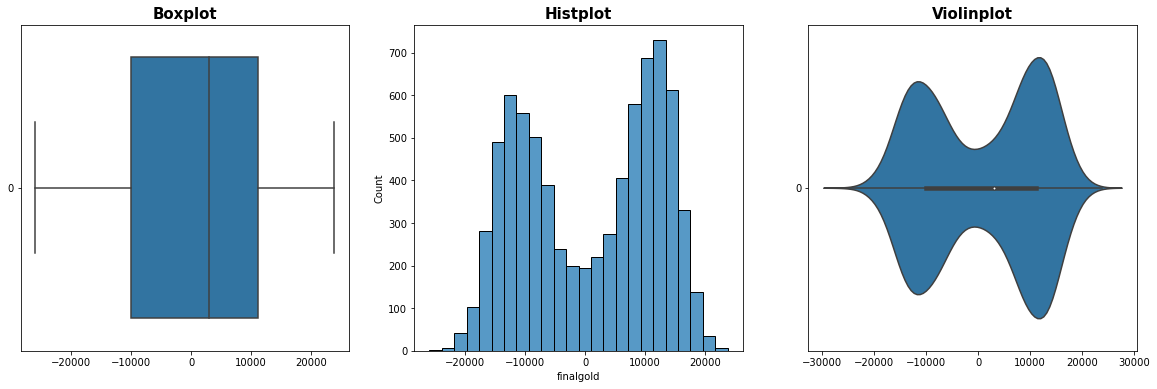

In [28]:
# Set up matplotlib figure with three subplots
f, axes = plt.subplots(1, 3, figsize=(20, 6))

# Plot the basic uni-variate figures for distribution of gold
p1 = plt.subplot2grid((1,3), (0,0))
sns.boxplot(data = length_df['finalgold'], orient = "h")
plt.title('Boxplot', fontsize=15, fontweight='bold')

p2 = plt.subplot2grid((1,3), (0,1))
sns.histplot(data = length_df,x='finalgold')
plt.title('Histplot', fontsize=15, fontweight='bold')

p3 = plt.subplot2grid((1,3), (0,2))
sns.violinplot(data = length_df['finalgold'], orient = "h")
plt.title('Violinplot', fontsize=15, fontweight='bold')

We can see a interesting distribution in the final gold difference. It is split into 2 areas, negative and positive. But this isnt surprising as in a match, it is very rare that the gold difference is zero, and most of the time, 1 team will have an advantage over the other one. 

However, we what we can do is to use the absolute value instead, this way we wont be differentiating between red and blue team, hence can get a more accurate representation of the distribution of gold diff.

Text(0.5, 1.0, 'Violinplot')

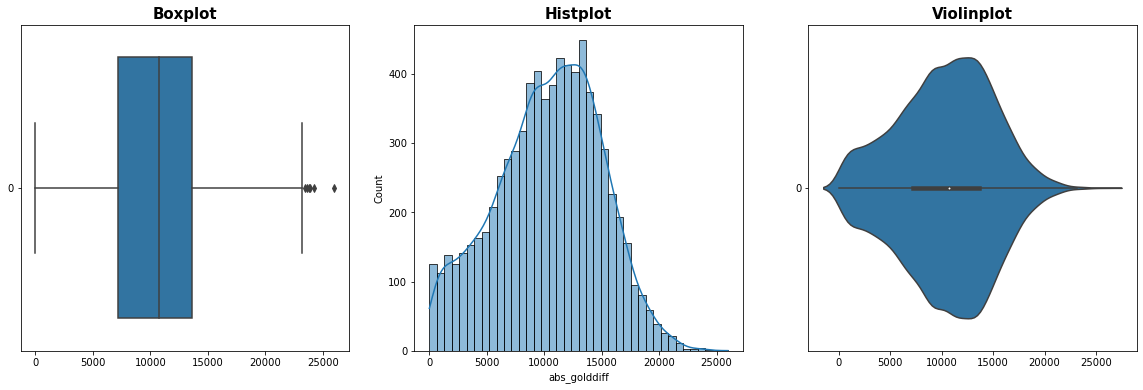

In [30]:
# abs the final gold col
length_df['abs_golddiff'] = length_df['finalgold'].abs()

# Set up matplotlib figure with three subplots
f, axes = plt.subplots(1, 3, figsize=(20, 6))

# Plot the basic uni-variate figures for distribution of gold
p1 = plt.subplot2grid((1,3), (0,0))
sns.boxplot(data = length_df['abs_golddiff'], orient = "h")
plt.title('Boxplot', fontsize=15, fontweight='bold')

p2 = plt.subplot2grid((1,3), (0,1))
sns.histplot(data = length_df['abs_golddiff'], kde=True)
plt.title('Histplot', fontsize=15, fontweight='bold')

p3 = plt.subplot2grid((1,3), (0,2))
sns.violinplot(data = length_df['abs_golddiff'], orient = "h")
plt.title('Violinplot', fontsize=15, fontweight='bold')

Now, we can see the actual distribution of gold diff. It seems to have a right-skewed distribution.

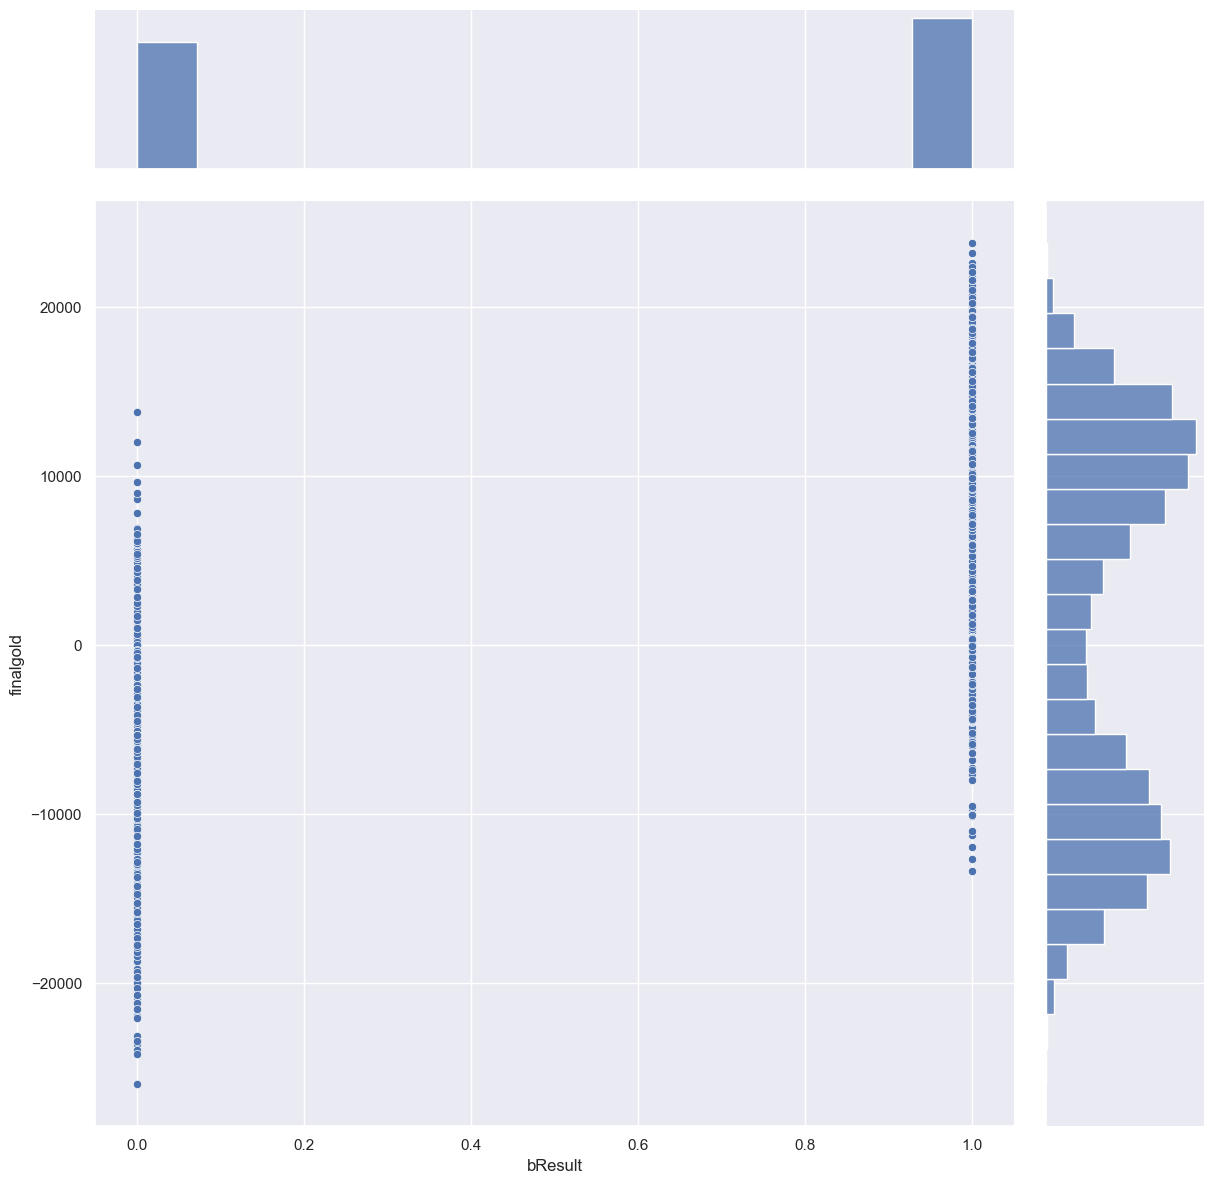

In [ ]:
# Draw jointplot of the two variables in the joined dataframe
sns.jointplot(data = length_df, x = "bResult", y = "finalgold", height = 12)

---

### Uni Variated Decision Tree Classification
Now, lets try and model a machine learning model thats taught, the decision tree classification.

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9651793525809274

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9595800524934384



<AxesSubplot: >

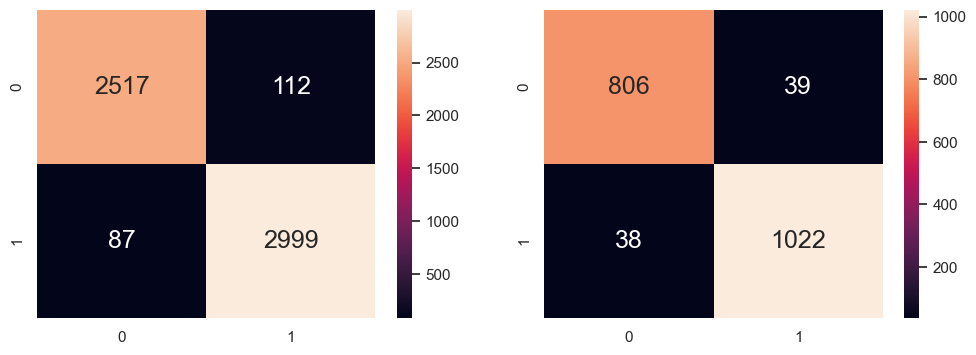

In [ ]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

# Recall the Legendary-Total Dataset
win = pd.DataFrame(length_df['bResult'])   # Response
goldiff = pd.DataFrame(length_df['finalgold'])       # Predictor

# Split the Legendary-Total Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(goldiff, win, test_size = 0.25)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Legendary values corresponding to Total
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

[Text(0.5, 0.9, 'golddiff <= -682.0\ngini = 0.497\nsamples = 5715\nvalue = [2629, 3086]\nclass = blue win'),
 Text(0.25, 0.7, 'golddiff <= -4534.5\ngini = 0.066\nsamples = 2601\nvalue = [2512, 89]\nclass = red win'),
 Text(0.125, 0.5, 'golddiff <= -7992.5\ngini = 0.015\nsamples = 2314\nvalue = [2297, 17]\nclass = red win'),
 Text(0.0625, 0.3, 'golddiff <= -13365.5\ngini = 0.006\nsamples = 1861\nvalue = [1855, 6]\nclass = red win'),
 Text(0.03125, 0.1, 'gini = 0.0\nsamples = 741\nvalue = [741, 0]\nclass = red win'),
 Text(0.09375, 0.1, 'gini = 0.011\nsamples = 1120\nvalue = [1114, 6]\nclass = red win'),
 Text(0.1875, 0.3, 'golddiff <= -7977.0\ngini = 0.047\nsamples = 453\nvalue = [442, 11]\nclass = red win'),
 Text(0.15625, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = blue win'),
 Text(0.21875, 0.1, 'gini = 0.043\nsamples = 452\nvalue = [442, 10]\nclass = red win'),
 Text(0.375, 0.5, 'golddiff <= -1881.0\ngini = 0.376\nsamples = 287\nvalue = [215, 72]\nclass = red win'),
 Text

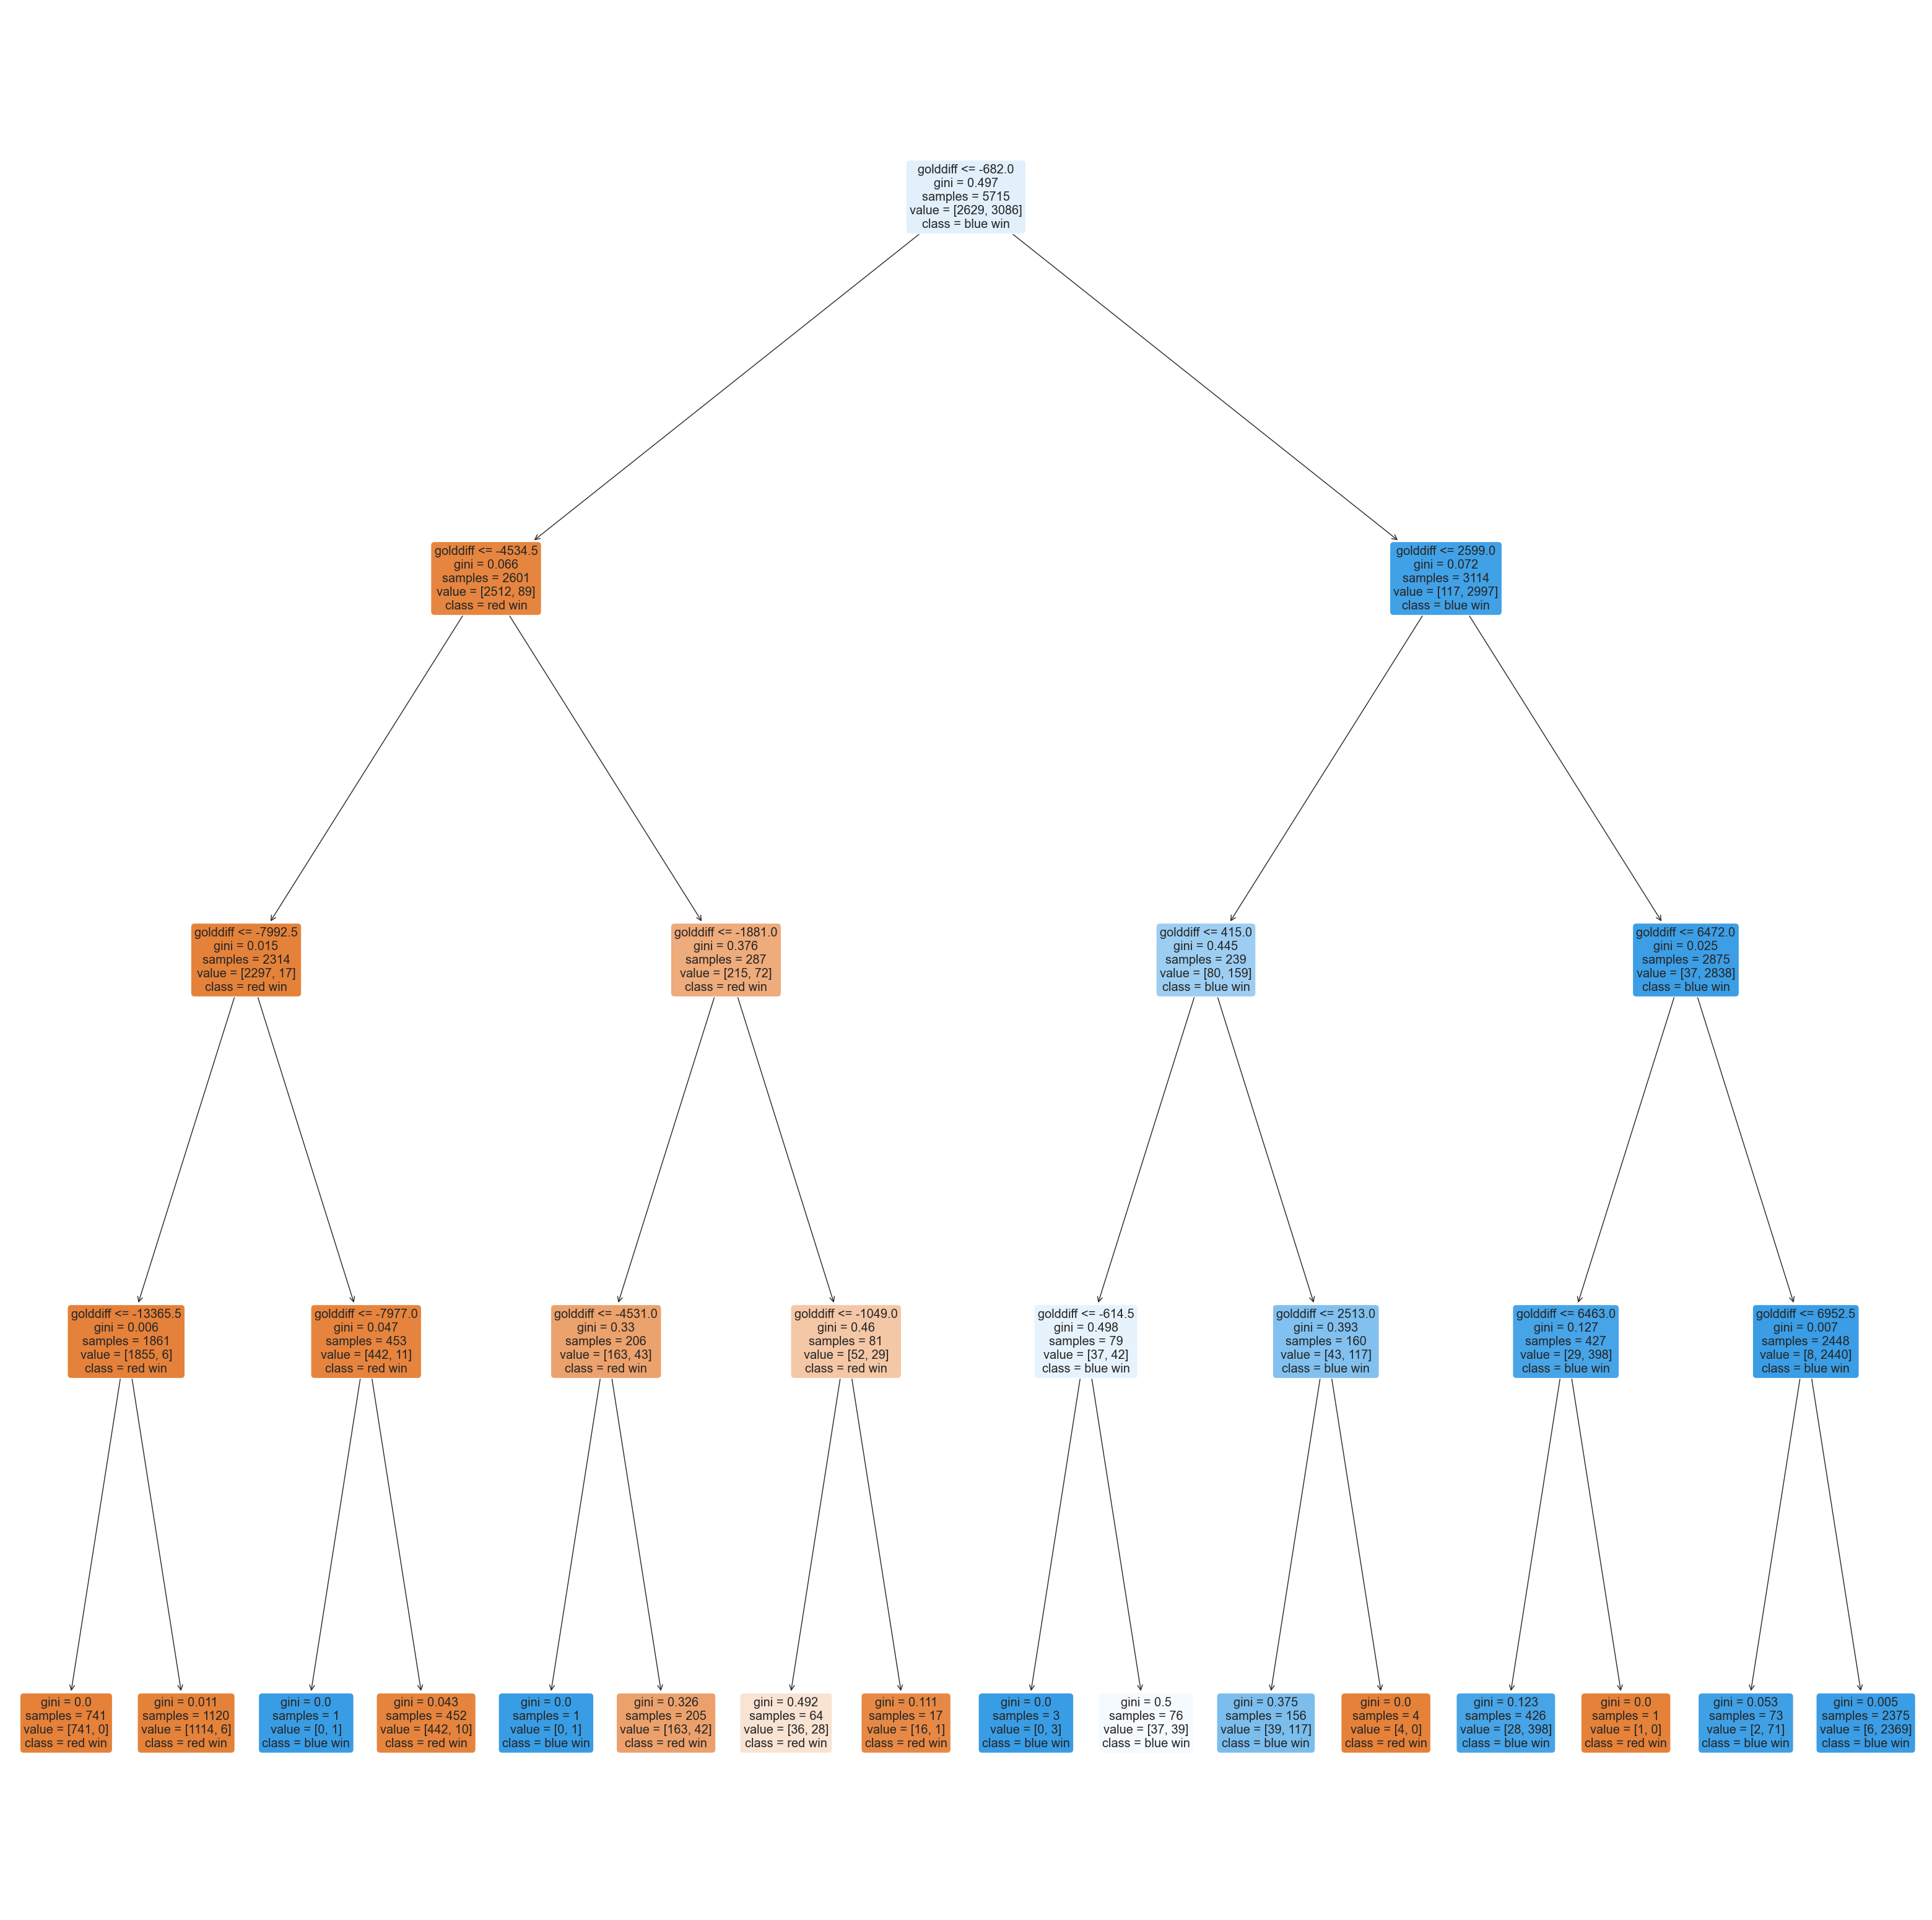

In [ ]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(40,40))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=["golddiff"], 
          class_names=["red win","blue win"])

In [ ]:
# Extract only the numeric data variables
numDF = pd.DataFrame(length_df[["bResult", "finalgold"]])

numDF.corr()

,bResult,finalgold
bResult,1.000000,0.894409
finalgold,0.894409,1.000000


<AxesSubplot: >

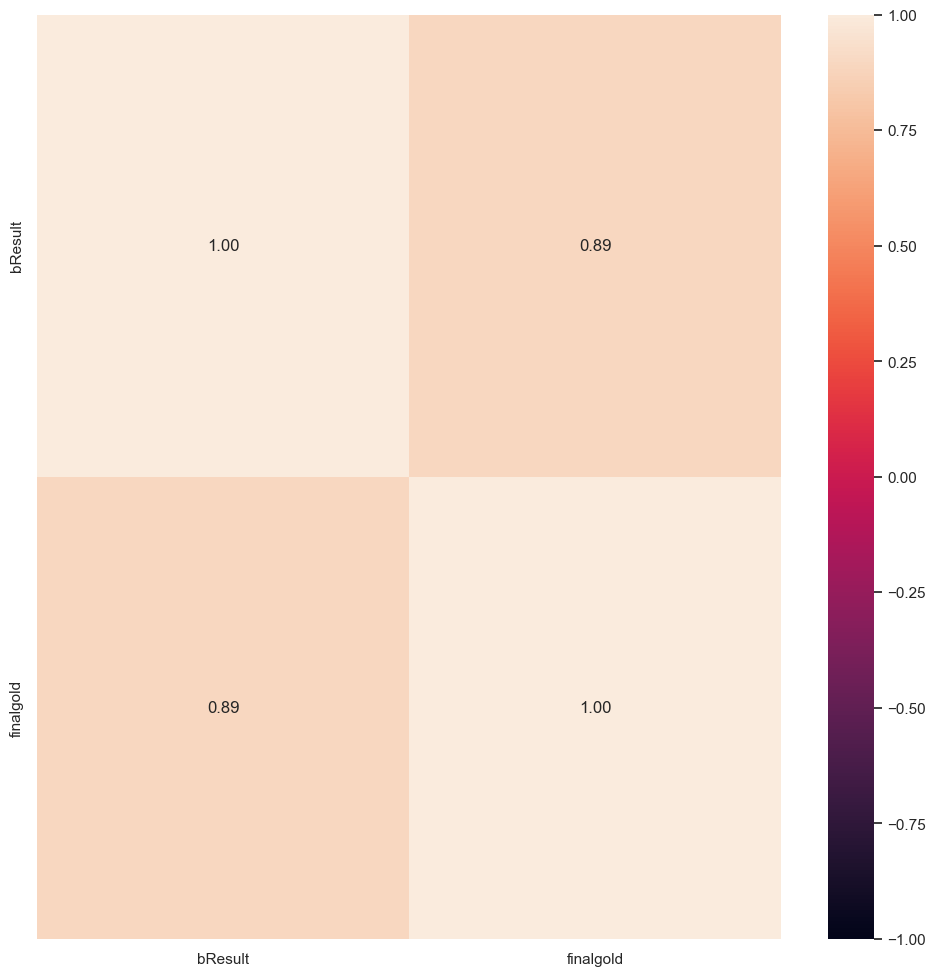

In [ ]:
# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(12, 12))
sb.heatmap(numDF.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

high correlation shows that gold difference (gold of blue team - gold of red team) is an important variable in predicting the outcome of the game

---
Continue in `TreesAndForest.ipynb`